# Vehicle Detect-Count


In this project, we will be working on detecting and counting vehicles in a given image or a video. We will be using OpenCV for image processing and Haar cascade which is used for object detection. We can also create our own customized haar cascade classifier.

In [1]:
# Import libraries
from PIL import Image
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt
%matplotlib inline

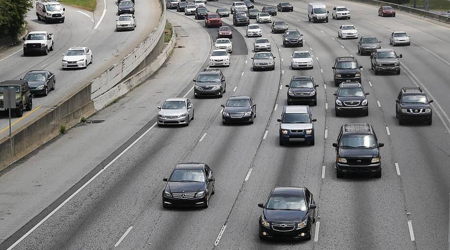

In [2]:
# Reading image form url
image = Image.open(requests.get('https://a57.foxnews.com/media.foxbusiness.com/BrightCove/854081161001/201805/2879/931/524/854081161001_5782482890001_5782477388001-vs.jpg', stream=True).raw)
image = image.resize((450,250))
image_arr = np.array(image)
image

In [3]:

grey = cv2.cvtColor(image_arr,cv2.COLOR_BGR2GRAY)
Image.fromarray(grey)
A=np.array(Image.fromarray(grey))
A

array([[ 66,  63,  72, ...,  84, 101, 115],
       [ 70,  48,  53, ...,  69,  69,  80],
       [ 78,  61,  39, ...,  67,  70,  70],
       ...,
       [ 86,  80,  84, ...,  98, 114, 129],
       [ 83,  80,  85, ..., 104, 114, 132],
       [ 81,  80,  85, ..., 106, 116, 132]], dtype=uint8)

Now in order to get better output, we will perform some transformations on the image. Here we wil convert the image into grayscale.

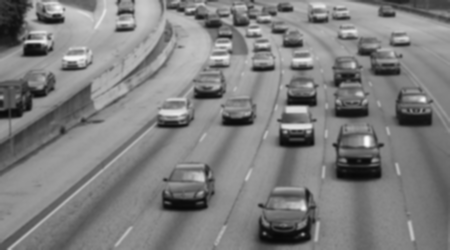

In [4]:
blur = cv2.GaussianBlur(grey,(5,5),0)
Image.fromarray(blur)

Next we will apply GaussianBlur to remove the noise from the image. Instead of a box filter consisting of equal filter coefficients, a Gaussian kernel is used. It is done with the function, cv2.GaussianBlur(). We should specify the width and height of the kernel which should be positive and odd.

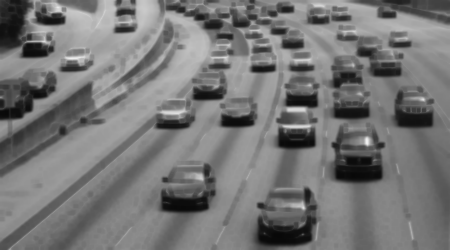

In [5]:

eroded = cv2.erode(blur,np.ones((3,3)))
Image.fromarray(eroded)

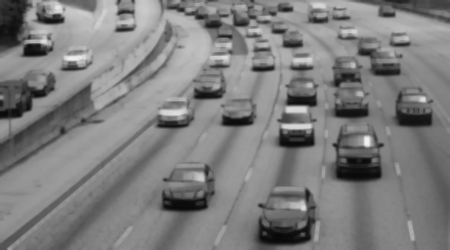

In [6]:
dilated = cv2.dilate(eroded,np.ones((3,3)))
Image.fromarray(dilated)

Here we will dilate image. It is just opposite of erosion. Here, a pixel element is '1' if atleast one pixel under the kernel is '1'. So it increases the white region in the image or size of foreground object increases.

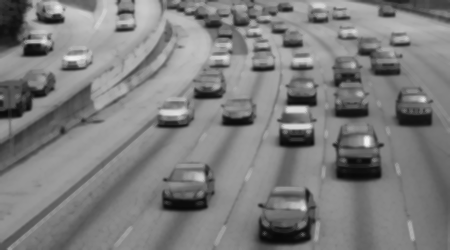

In [7]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
closing = cv2.morphologyEx(dilated, cv2.MORPH_OPEN, kernel)
Image.fromarray(closing)

Now we will perform Morphology transformation with kernel. MorphologyEx is used to find the difference between dilation and erosion of an image.
You may need elliptical/circular shaped kernels. So for this purpose, OpenCV has a function, cv2.getStructuringElement(). You just pass the shape and size of the kernel, you get the desired kernel.

In [9]:

car_cascade_src = 'cars.xml'
car_cascade = cv2.CascadeClassifier(car_cascade_src)
cars = car_cascade.detectMultiScale(closing, 1.069, 1)
cars

array([[376,   1,  22,  22],
       [331,   5,  21,  21],
       [265,  17,  25,  25],
       [305,   3,  28,  28],
       [253,   8,  22,  22],
       [215,  24,  20,  20],
       [230,   9,  22,  22],
       [201,  10,  24,  24],
       [388,  29,  25,  25],
       [274,  24,  34,  34],
       [334,  21,  26,  26],
       [101,   3,  42,  42],
       [ 10,  19,  51,  51],
       [322,  12,  44,  44],
       [362,  40,  49,  49],
       [204,  48,  30,  30],
       [ 52,  42,  42,  42],
       [239,  40,  46,  46],
       [285,  46,  35,  35],
       [270,  37,  50,  50],
       [179,  61,  53,  53],
       [320,  73,  62,  62],
       [207,  87,  55,  55],
       [146,  92,  52,  52],
       [383,  80,  62,  62],
       [267, 103,  61,  61],
       [278,  84, 130, 130],
       [318, 121,  82,  82],
       [146, 156,  76,  76]], dtype=int32)

In [10]:
cnt = 0
for (x,y,w,h) in cars:
  cv2.rectangle(image_arr,(x,y),(x+w,y+h),(255,0,0),2)
  cnt += 1
print(cnt, " cars found")
Image.fromarray(image_arr)
image_arr

29  cars found


array([[[ 71,  79,  40],
        [ 68,  75,  36],
        [ 77,  83,  47],
        ...,
        [ 87,  90,  71],
        [103, 106,  92],
        [117, 118, 109]],

       [[ 76,  81,  45],
        [ 55,  59,  24],
        [ 60,  64,  30],
        ...,
        [ 72,  75,  55],
        [ 72,  74,  59],
        [ 82,  84,  73]],

       [[ 87,  88,  56],
        [ 70,  71,  39],
        [ 47,  48,  18],
        ...,
        [ 70,  73,  53],
        [ 72,  75,  58],
        [ 72,  75,  59]],

       ...,

       [[ 86,  86,  86],
        [ 80,  80,  80],
        [ 84,  84,  84],
        ...,
        [ 98,  98,  98],
        [113, 114, 114],
        [128, 129, 131]],

       [[ 83,  83,  83],
        [ 80,  80,  80],
        [ 85,  85,  85],
        ...,
        [104, 104, 104],
        [114, 114, 115],
        [131, 132, 134]],

       [[ 81,  81,  81],
        [ 80,  80,  80],
        [ 85,  85,  85],
        ...,
        [106, 106, 106],
        [116, 116, 117],
        [131, 132, 134]]

Now we will use the above returned contours and draw a rectangle around detected cars. Here we will see that it will create the rectangle with red boundary around each and every car it detects.

In [11]:
# Reading image form url
image2 = Image.open(requests.get('https://qph.fs.quoracdn.net/main-qimg-b5c4e39dcd48dddd9e609e6022f74d85', stream=True).raw)
image2 = image2.resize((450,250))
image_arr2 = np.array(image2)
grey2 = cv2.cvtColor(image_arr2,cv2.COLOR_BGR2GRAY)

Now we will use another image i.e. bus image and we will fetch this image from the internet. We will resize the image and store it as a numpy array and also convert it into grayscale.

In [12]:
bus_cascade_src = 'Bus_front.xml'
bus_cascade = cv2.CascadeClassifier(bus_cascade_src)
bus = bus_cascade.detectMultiScale(grey2, 1.1, 1)

As we are working with the bus image here so we require the cascade for detecting the bus. We will use Bus_front cascade to identify bus from the image. We will perform similar operation as performed above.

1  bus's found


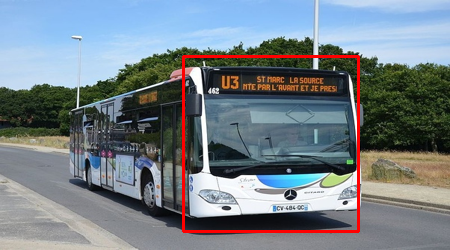

In [13]:
cnt = 0
for (x,y,w,h) in bus:
  cv2.rectangle(image_arr2,(x,y),(x+w,y+h),(255,0,0),2)
  cnt += 1
print(cnt, " bus's found")
Image.fromarray(image_arr2)

As we did in car cascading similarly we will be performing the same contour operations on the bus image and create a rectangle around the bus if detected any.

In [15]:
source = 'Cars.mp4'  # source = 0 for webcam

cap = cv2.VideoCapture(source)

In [16]:
if (cap.isOpened()== False):
  print("Error opening video stream or file")
ret, frame = cap.read()


In [17]:
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
print(frame_height)
# Define the codec and create VideoWriter object.
out_avi = cv2.VideoWriter('race_car_out2.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))

out_mp4 = cv2.VideoWriter('race_car_out3.mp4',cv2.VideoWriter_fourcc(*'XVID'), 10, (450,250))

360


In [18]:


# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()

  if ret == True:

    # Write the frame to the output files
    out_avi.write(frame)

  # Break the loop
  else:
    break


In [19]:
source = 'Cars.mp4'  # source = 0 for webcam

cap = cv2.VideoCapture(source)

In [20]:
if (cap.isOpened()== False):
  print("Error opening video stream or file")
ret, frame = cap.read()

In [21]:
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
print(frame_height)
# Define the codec and create VideoWriter object.
out_avi1 = cv2.VideoWriter('race_car_out4.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))

360


In [22]:
cascade_src = 'cars.xml'
car_cascade = cv2.CascadeClassifier(cascade_src)
if (cap.isOpened()== False):
  print("Error opening video stream or file")
ret, img = cap.read()
print(ret)


True


Now we will perform the vehicle detection and counting in a video. For creating the output video from frames or images we need cv2.VideoWriter() method. It take path with extension as first parameter, second parameter is the codec for output format, then we also need to pass frames per second and height and width.

In [23]:


# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()

  if ret == True:
    grey = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(grey,(5,5),0)
    eroded = cv2.erode(blur,np.ones((3,3)))
    dilated = cv2.dilate(eroded,np.ones((3,3)))
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
    closing = cv2.morphologyEx(dilated, cv2.MORPH_OPEN, kernel)
    cars = car_cascade.detectMultiScale(closing, 1.069, 1)

    for (x,y,w,h) in cars:
      cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    # Write the frame to the output files
    out_avi1.write(frame)

  # Break the loop
  else:
    break


Now we will read frames one by one from the input video, convert them into grayscale and using car cascade to detect all cars in that particular frame. In the end we write this video using video.write() method and video.release() will save this video to the given path.

# Conclusion:

We started with downloading the image we will be working on and performed different operations on that image. We saw how we can use haar cascade which is used for object detection. We saw how different haar cascade is used for car detection, bus detection. Similarly, you can use many pretrained haar cascades for different object detection.

## Scope:

As haar cascade is used for object detection we have a very vast scope for this project. It can be used for any type of object detection. We can also create our own custom haar cascade for specific object.